# 50 Start Ups

Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.


R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit  -- profit of each state in the past few years


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.metrics import mean_squared_error 

In [2]:
df=pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df=df.rename(columns= {"R&D Spend" : "RnD", "Administration" : "admin", 
                        "Marketing Spend" : "marketing", "State": "state", "Profit" : "profit"})
df.head() 

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


One Hot Encoding

In [4]:
df1=pd.get_dummies(df)
df1=df1.rename(columns={"state_New York": "state_NewYork"})
df1.head()

,RnD,admin,marketing,profit,state_California,state_Florida,state_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


Check for missing values

In [5]:
df.isnull().sum().sum()

0

Check for duplicate values

In [6]:
df.duplicated().sum()

0

Glance at pattern and structure of data

In [7]:
df.describe()

,RnD,admin,marketing,profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
df1.state_California.sum()

17

In [9]:
df1.state_Florida.sum()

16

In [10]:
df1.state_NewYork.sum()

17

## Visualise distribution of data & Outlier detection 

## Feature: RnD

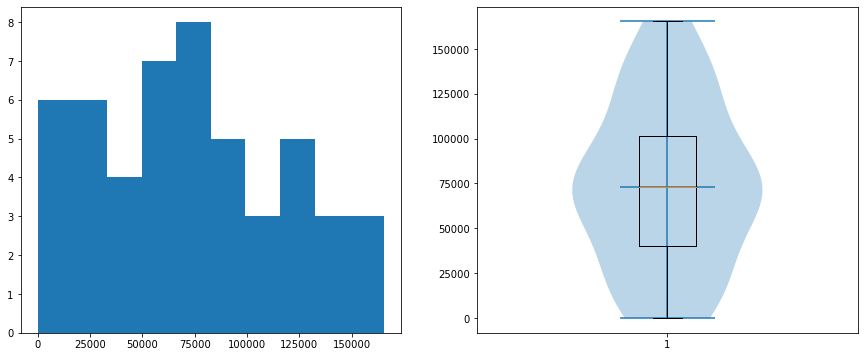

In [11]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(df.RnD)

plt.subplot(1,2,2)
plt.violinplot(df["RnD"],showmedians=True)
plt.boxplot(df["RnD"])
plt.show()

## Feature: admin 

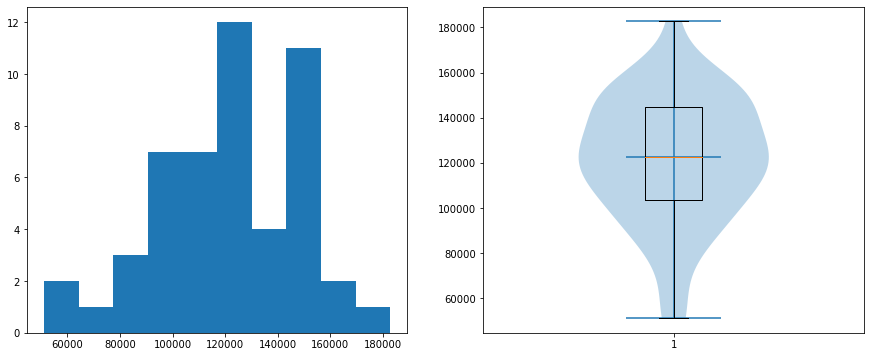

In [12]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(df.admin)

plt.subplot(1,2,2)
plt.violinplot(df["admin"],showmedians=True)
plt.boxplot(df["admin"])
plt.show()

## Feature: marketing 

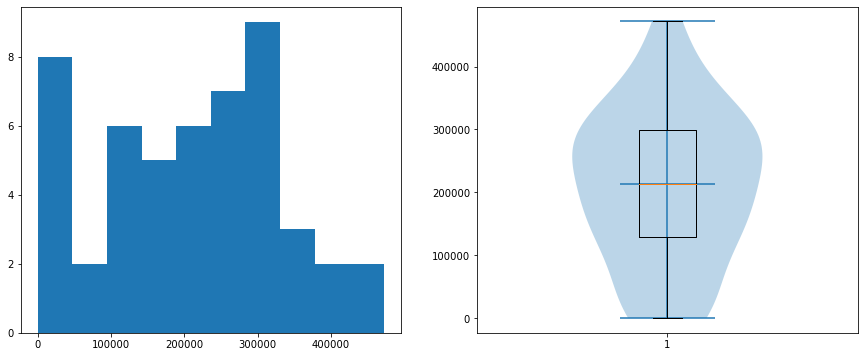

In [13]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(df.marketing)

plt.subplot(1,2,2)
plt.violinplot(df["marketing"],showmedians=True)
plt.boxplot(df["marketing"])
plt.show()

## Feature: profit 

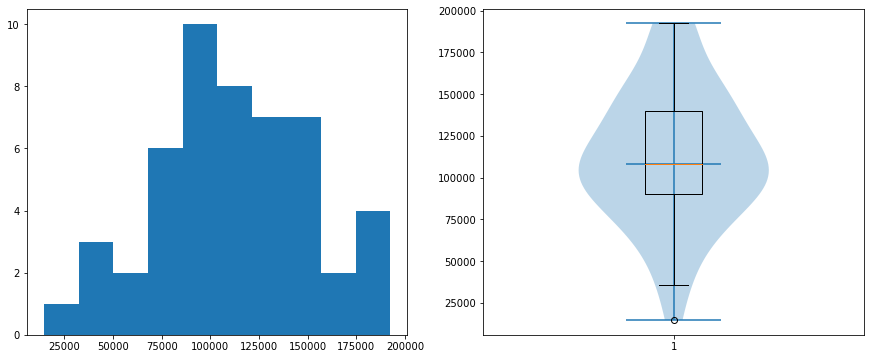

In [14]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(df.profit)

plt.subplot(1,2,2)
plt.violinplot(df["profit"],showmedians=True)
plt.boxplot(df["profit"])
plt.show()

Removing outlier from profit

In [15]:
Q1,Q3 = np.percentile(df.profit , [25,75])
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR
outliers = df.profit[(df.profit > ul) | (df.profit < ll)]
outliers

49    14681.4
Name: profit, dtype: float64

In [16]:
df=df.drop(index=49)
df.tail()

,RnD,admin,marketing,state,profit
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41


In [17]:
df1=df1.drop(index=49)
df1.tail()

,RnD,admin,marketing,profit,state_California,state_Florida,state_NewYork
44,22177.74,154806.14,28334.72,65200.33,1,0,0
45,1000.23,124153.04,1903.93,64926.08,0,0,1
46,1315.46,115816.21,297114.46,49490.75,0,1,0
47,0.00,135426.92,0.00,42559.73,1,0,0
48,542.05,51743.15,0.00,35673.41,0,0,1


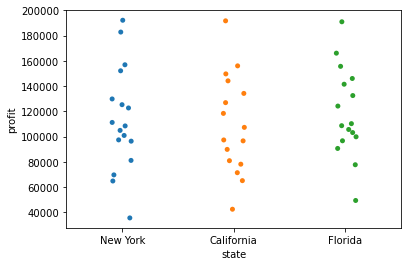

In [18]:
sns.stripplot(x='state', y='profit', data=df)
plt.ylabel('profit')
plt.show()

## Correlation Matrix

In [19]:
df.corr()

,RnD,admin,marketing,profit
RnD,1.000000,0.243438,0.711654,0.978437
admin,0.243438,1.000000,-0.037280,0.205841
marketing,0.711654,-0.037280,1.000000,0.739307
profit,0.978437,0.205841,0.739307,1.000000


Visualise relations between variables with scatterplot

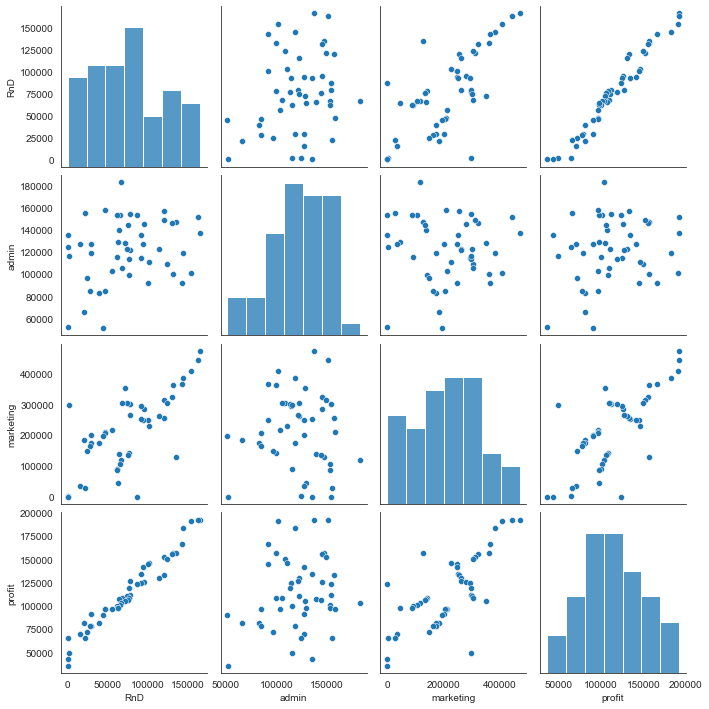

In [20]:
sns.set_style(style='white') #color of the background 
sns.pairplot(df)

# Preparing a simple linear regression model

In [21]:
ml_r=smf.ols("profit ~ RnD",data = df1).fit()  

print(ml_r.rsquared, ml_r.rsquared_adj)
print(ml_r.pvalues) 

0.9573395972488337 0.9564319291051918
Intercept    2.221695e-27
RnD          7.555104e-34
dtype: float64


In [22]:
ml_r_pred_y =ml_r.predict(df1)
ml_r_rmse =np.sqrt(mean_squared_error(df1.profit , ml_r_pred_y)) 
ml_r_rmse 

7803.1759736831145

In [23]:
ml_a=smf.ols("profit ~ admin",data = df1).fit()  

print(ml_a.rsquared, ml_a.rsquared_adj)
print(ml_a.pvalues) 

0.04237035844418102 0.02199525968767435
Intercept    0.001618
admin        0.155918
dtype: float64


In [24]:
ml_a_pred_y =ml_a.predict(df1)
ml_a_rmse =np.sqrt(mean_squared_error(df1.profit , ml_a_pred_y)) 
ml_a_rmse

36970.70357886751

In [25]:
ml_m=smf.ols("profit ~ marketing",data = df1).fit()  

print(ml_m.rsquared, ml_m.rsquared_adj)
print(ml_m.pvalues) 

0.5465748398585546 0.536927496025758
Intercept    5.905020e-11
marketing    1.304853e-09
dtype: float64


In [26]:
ml_m_pred_y =ml_m.predict(df1)
ml_m_rmse =np.sqrt(mean_squared_error(df1.profit , ml_m_pred_y)) 
ml_m_rmse 

25439.685203027788

# Preparing a multilinear regression model 

In [27]:
model = smf.ols('profit ~ RnD + admin + marketing  + state_California + state_Florida + state_NewYork', data=df1).fit()

print(model.rsquared,model.rsquared_adj)
print(model.pvalues)

0.9618082858227786 0.9573673888254273
Intercept           9.775355e-12
RnD                 1.898629e-23
admin               6.162761e-01
marketing           7.828496e-02
state_California    2.245343e-08
state_Florida       1.586488e-06
state_NewYork       4.952785e-07
dtype: float64


In [28]:
model_pred_y =model.predict(df1)
model_rmse =np.sqrt(mean_squared_error(df1.profit , model_pred_y)) 
model_rmse 

7383.180758323904

In [29]:
modela = smf.ols('profit ~ RnD + admin + marketing ', data=df1).fit()

print(modela.rsquared,modela.rsquared_adj)
print(modela.pvalues)

#notice that R square adj value improved upon deletion of state feature.

0.9613162435129847 0.9587373264138503
Intercept    2.960000e-12
RnD          1.971077e-24
admin        6.070728e-01
marketing    7.458443e-02
dtype: float64


In [30]:
modela_pred_y =modela.predict(df1)
modela_rmse =np.sqrt(mean_squared_error(df1.profit , modela_pred_y)) 
modela_rmse 

7430.589093678349

In [31]:
model1 = smf.ols('profit ~ RnD + marketing  + state_California + state_Florida + state_NewYork', data=df1).fit()

print(model1.rsquared,model1.rsquared_adj)
print(model1.pvalues)

#removed admin due to high p value

0.9615819564241955 0.9580894070082133
Intercept           3.126811e-24
RnD                 3.778016e-25
marketing           4.319247e-02
state_California    1.773995e-10
state_Florida       4.306188e-08
state_NewYork       1.071371e-08
dtype: float64


In [32]:
model1_pred_y =model1.predict(df1)
model1_rmse =np.sqrt(mean_squared_error(df1.profit , model1_pred_y)) 
model1_rmse 

7405.025319572258

In [33]:
model1a = smf.ols('profit ~ RnD + marketing ' , data=df1).fit()

print(model1a.rsquared,model1a.rsquared_adj)
print(model1a.pvalues)

0.9610856807456628 0.9593937538215612
Intercept    1.970460e-25
RnD          3.628510e-26
marketing    4.084443e-02
dtype: float64


In [34]:
model1a_pred_y =model1a.predict(df1)
model1a_rmse =np.sqrt(mean_squared_error(df1.profit , model1a_pred_y)) 
model1a_rmse 

7452.700079547001

In [35]:
model2 = smf.ols('profit ~ RnD + admin + state_California + state_Florida + state_NewYork', data=df1).fit()

print(model2.rsquared,model2.rsquared_adj)
print(model2.pvalues)

0.9589186975347428 0.9551840336742649
Intercept           3.915755e-14
RnD                 1.245905e-31
admin               2.790525e-01
state_California    4.603323e-09
state_Florida       2.468274e-08
state_NewYork       1.083007e-07
dtype: float64


In [36]:
model2_pred_y =model2.predict(df1)
model2_rmse =np.sqrt(mean_squared_error(df1.profit , model2_pred_y)) 
model2_rmse 

7657.394597553529

In [37]:
model2a = smf.ols('profit ~ RnD + admin', data=df1).fit()

print(model2a.rsquared,model2a.rsquared_adj)
print(model2a.pvalues)

0.9584519070123048 0.9566454681867528
Intercept    1.210032e-14
RnD          5.451979e-33
admin        2.728844e-01
dtype: float64


In [38]:
model2a_pred_y =model2a.predict(df1)
model2a_rmse =np.sqrt(mean_squared_error(df1.profit , model2a_pred_y)) 
model2a_rmse 

7700.775681775509

In [39]:
model3 = smf.ols('profit ~ RnD + state_California + state_Florida + state_NewYork', data=df1).fit()

print(model3.rsquared,model3.rsquared_adj)
print(model3.pvalues)

0.957797215080174 0.9549836960855189
Intercept           2.820149e-26
RnD                 1.775643e-32
state_California    2.558546e-10
state_Florida       3.357377e-09
state_NewYork       1.426591e-08
dtype: float64


In [40]:
model3_pred_y =model3.predict(df1)
model3_rmse =np.sqrt(mean_squared_error(df1.profit , model3_pred_y)) 
model3_rmse 

7761.210824208707

In [41]:
model3a = smf.ols('profit ~ RnD' , data=df1).fit()

print(model3a.rsquared,model3a.rsquared_adj)
print(model3a.pvalues)

0.9573395972488337 0.9564319291051918
Intercept    2.221695e-27
RnD          7.555104e-34
dtype: float64


In [42]:
model3a_pred_y =model3a.predict(df1)
model3a_rmse =np.sqrt(mean_squared_error(df1.profit , model3a_pred_y)) 
model3a_rmse 

7803.1759736831145

# R Square value for each prepared model

In [43]:
R_sqr_adj= 0

In [44]:
R_sqr_adj= pd.DataFrame()
R_sqr_adj["Models"]=["profit ~ RnD", "profit ~ admin", "profit ~ marketing", "profit ~ RnD + admin + marketing + states",
                 "profit ~ RnD + admin + marketing", "profit ~ RnD + marketing  + states", "profit ~ RnD + marketing",
                 "profit ~ RnD + admin + states", "profit ~ RnD + admin", "profit ~ RnD + states" , "profit ~ RnD"]
 
R_sqr_adj["R_Sqr"]=[ml_r.rsquared, ml_a.rsquared, ml_m.rsquared, model.rsquared, modela.rsquared,
                model1.rsquared, model1a.rsquared, model2.rsquared, model2a.rsquared, model3.rsquared,
                model3a.rsquared]
                    
R_sqr_adj["R_Sqr_adj"]=[ml_r.rsquared_adj, ml_a.rsquared_adj, ml_m.rsquared_adj, model.rsquared_adj, modela.rsquared_adj,
                model1.rsquared_adj, model1a.rsquared_adj, model2.rsquared_adj, model2a.rsquared_adj, model3.rsquared_adj,
                model3a.rsquared_adj]

R_sqr_adj['RMSE'] = [ml_r_rmse , ml_a_rmse , ml_m_rmse , model_rmse, modela_rmse, model1_rmse, model1a_rmse, 
                    model2_rmse , model2a_rmse, model3_rmse, model3a_rmse]

R_sqr_adj.set_index('Models', inplace=True)
R_sqr_adj 

,R_Sqr,R_Sqr_adj,RMSE
Models,,,
profit ~ RnD,0.957340,0.956432,7803.175974
profit ~ admin,0.042370,0.021995,36970.703579
profit ~ marketing,0.546575,0.536927,25439.685203
profit ~ RnD + admin + marketing + states,0.961808,0.957367,7383.180758
profit ~ RnD + admin + marketing,0.961316,0.958737,7430.589094
profit ~ RnD + marketing + states,0.961582,0.958089,7405.025320
profit ~ RnD + marketing,0.961086,0.959394,7452.700080
profit ~ RnD + admin + states,0.958919,0.955184,7657.394598
profit ~ RnD + admin,0.958452,0.956645,7700.775682


In [45]:
R_sqr_adj["R_Sqr_adj"].idxmax()

'profit ~ RnD + marketing'

In [46]:
print("Maximum R square adj value is obtained in model with variables:", R_sqr_adj["R_Sqr_adj"].idxmax() )

Maximum R square adj value is obtained in model with variables: profit ~ RnD + marketing


# Model Testing

Assupmtion for multi linear Regression are as follows:

### 1)Feature should be independent of each other

In [47]:
final_model = smf.ols('profit ~ RnD + marketing', data=df1).fit()

print(final_model.rsquared,final_model.rsquared_adj)
print(final_model.pvalues)

0.9610856807456628 0.9593937538215612
Intercept    1.970460e-25
RnD          3.628510e-26
marketing    4.084443e-02
dtype: float64


P value of both input variables (RnD and marketing) are less than 0.05, which indicates contribution of both input variables in predicting output is of statistical importance and not a matter of chance.

In addition to p value, we can calculate Variance Inflation Factor (VIF) which helps to check the dependency among the features by building a model without the target and testing various combination among the features

Calculating VIF 

In [48]:
rsq_RnD = smf.ols('RnD ~  admin + marketing',data=df).fit().rsquared  
vif_RnD = 1/(1-rsq_RnD) 

rsq_admin = smf.ols('admin ~ RnD + marketing',data=df).fit().rsquared  
vif_admin = 1/(1-rsq_admin)
 
rsq_marketing = smf.ols('marketing ~ RnD + admin',data=df).fit().rsquared  
vif_marketing = 1/(1-rsq_marketing) 

# Storing vif values in a data frame
d1 = {'Variables':['RnD','admin','marketing'],'VIF':[vif_RnD,vif_admin,vif_marketing]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RnD,2.377754
1,admin,1.175172
2,marketing,2.239957


None of the variables has VIF>20, that means no colinearity among input features, that means input features are independent of each other

### 2)Residues i.e. errors (xi-xi^) should be independently and normally distributed.

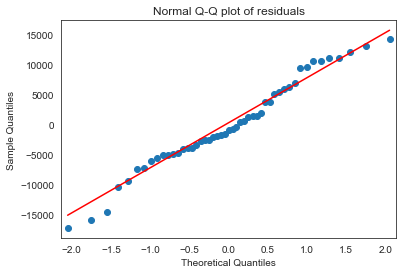

In [49]:
import statsmodels.api as sm
qqplot=sm.qqplot(final_model.resid,line="q")
plt.title("Normal Q-Q plot of residuals")
plt.show() 

 On a Q-Q plot normally distributed data appears as roughly a straight line 
 
 Hence, errors are normally distributed, and there is no trend in errors.

### 3) Some errors are positive, some are negative. Hence mean of errors should be zero

In [50]:
errors=model.resid 
errors.mean() 

1.8428797876386314e-07

### 4) Constant Variance (Homoscedasticity)

Homoscedasticity refers to a condition in which the variance of the residual or error term, in a regression model is constant

In [51]:
final_model.fittedvalues.head()

0    190942.726927
1    188043.924520
2    179957.312472
3    172246.416164
4    170022.687457
dtype: float64

In [52]:
final_model.resid.head()

0     1319.103073
1     3748.135480
2    11093.077528
3    10655.573836
4    -3834.747457
dtype: float64

In [53]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

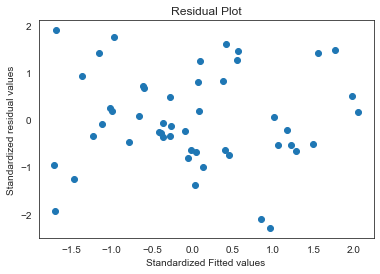

In [54]:
plt.scatter(get_standardized_values(final_model.fittedvalues),
            get_standardized_values(final_model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

eval_env: 1


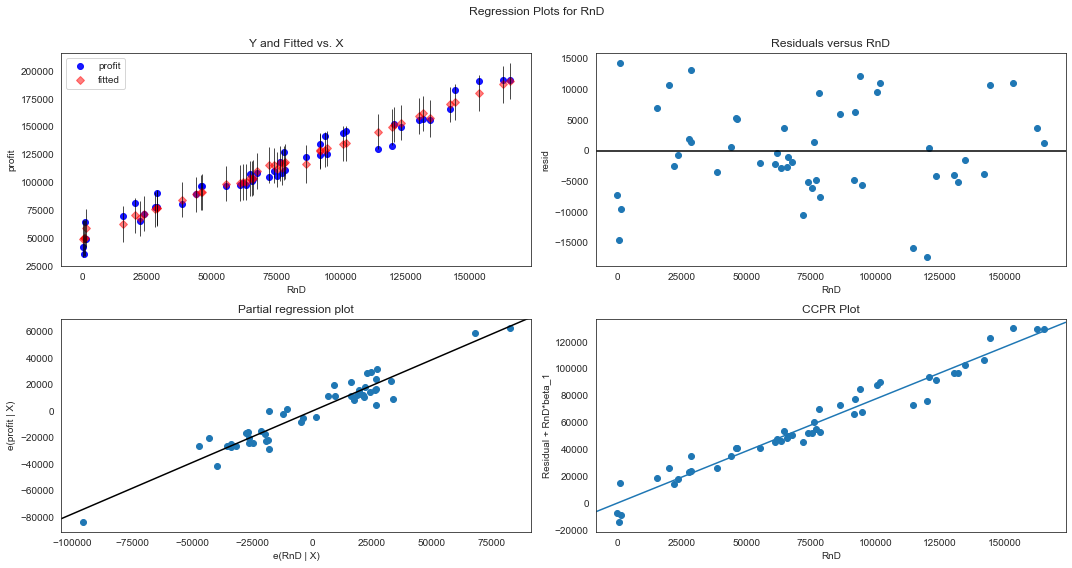

In [55]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(final_model, "RnD", fig=fig)
plt.show()

eval_env: 1


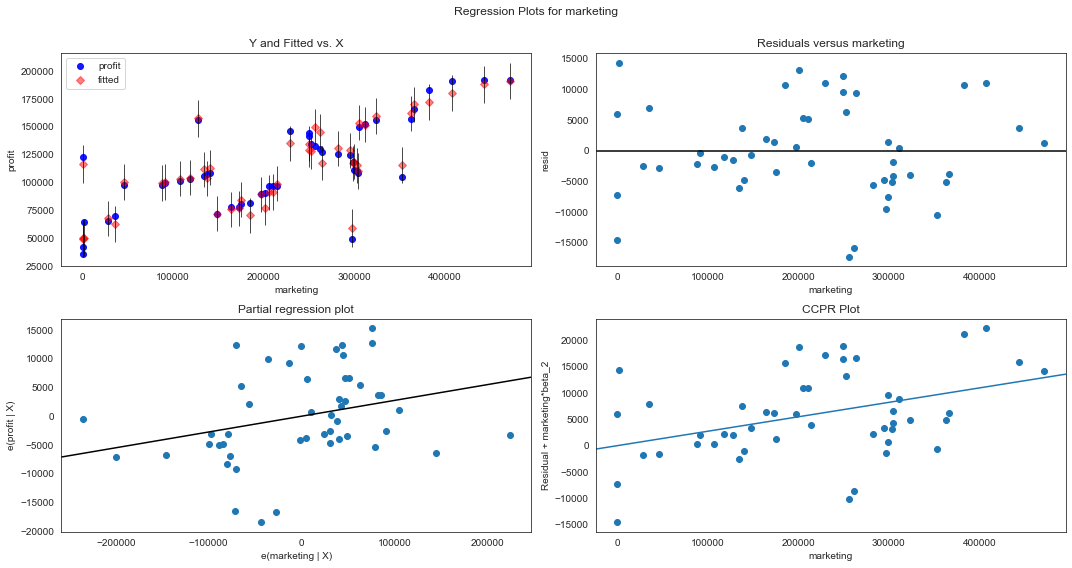

In [56]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(final_model, "marketing", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

### Cook’s Distance

In [57]:
influence_points=final_model.get_influence()
c,p_value= influence_points.cooks_distance 

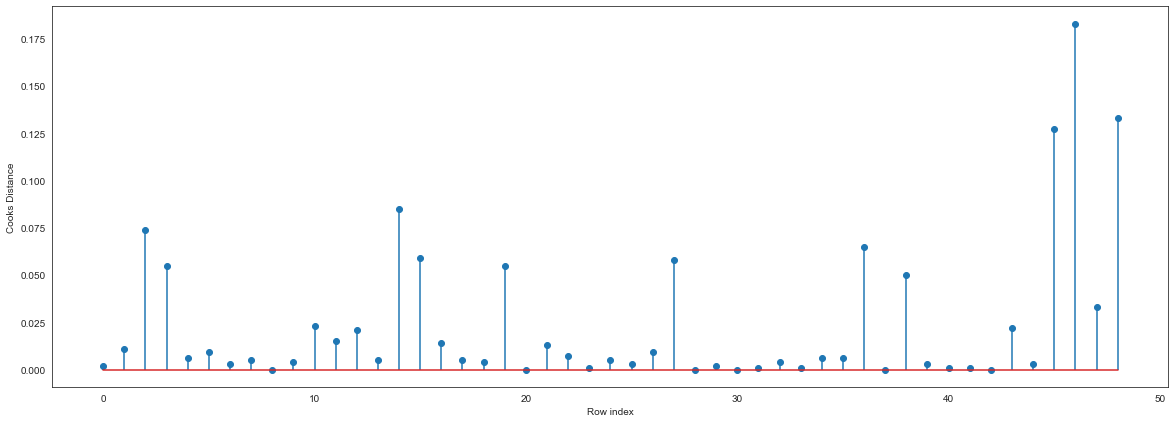

In [58]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [59]:
(np.argmax(c),np.max(c))

(46, 0.1833755649133868)

### High Influence Points

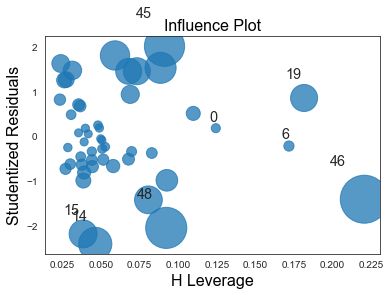

In [60]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_model)
plt.show()

Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints

In [61]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff 

0.36734693877551017

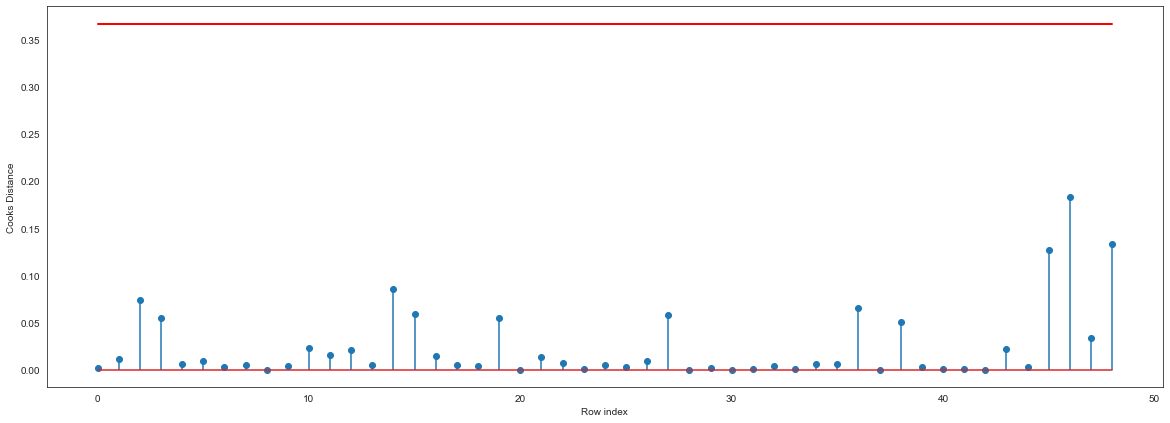

In [62]:
fig = plt.subplots(figsize=(20, 7))

x=[0,48]
y=[0.367,0.367]
plt.plot(x, y, color = 'red', linewidth = 2)

plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

All the points are below our cut-off line Hence no influencers present in our model

# Prediction

Prediction on train data 

In [63]:
y_pred=pd.DataFrame(final_model.predict(df)) 

In [64]:
df.join(y_pred) 

,RnD,admin,marketing,state,profit,0
0,165349.20,136897.80,471784.10,New York,192261.83,190942.726927
1,162597.70,151377.59,443898.53,California,191792.06,188043.924520
2,153441.51,101145.55,407934.54,Florida,191050.39,179957.312472
3,144372.41,118671.85,383199.62,New York,182901.99,172246.416164
4,142107.34,91391.77,366168.42,Florida,166187.94,170022.687457
5,131876.90,99814.71,362861.36,New York,156991.12,161999.405410
6,134615.46,147198.87,127716.82,California,156122.51,157669.178690
7,130298.13,145530.06,323876.68,Florida,155752.60,159705.298181
8,120542.52,148718.95,311613.29,New York,152211.77,151804.380605
9,123334.88,108679.17,304981.62,California,149759.96,153787.521922


Prediction on new data

In [65]:
new_data=pd.DataFrame({"RnD":50000, "admin":10000, "marketing":25000,"state":"California"},index=[1] ) 

In [66]:
final_model.predict(new_data) 

1    89240.600805
dtype: float64

# Thank You